# Exercise 1 - Feedforward NN

In this notebook you will learn to implement a simple feedforward neural net in Keras. Your initial network will learn to recognise handwritten digits in no time! You will also learn to create a larger feedforward net and add regularisation layers to it, so that you can prevent overfitting as discussed in the lecture.

This first notebook serves as a gentle introduction. At various points we will ask you to complete the given code. They will look like this:

In [ ]:
def some_function(x):
    '''Function that squares the input, then returns the result'''
    ##Insert your code below (approx. 1 line)
    x = None
    ##End of your code
    return x

Your task in these sections is to complete the code between the two lines beginning with "##". There is always a description of what the function should *do* at the top. The number of lines we expect you to write is also given as a hint. These are approximations depending on how you choose to  solve the problem.

In this case you would change the line

In [ ]:
x = None

into one of the options described below. Note that usually there is more than one correct solution. Where applicable, the **expected output** is given, so that you can check your implementation is correct.

In [ ]:
x = x**x

x = np.square(x)

x = np.power(x, 2)

## 1 - Packages

The first thing to do is import the required packages for this tutorial:

- [NumPy](http://www.numpy.org) is a package optimised for (scientific) numerical computing with Python;
- [matplotlib](https://matplotlib.org/) is a package to plot and visualise data using Python;
- [Keras](https://www.keras.io) is the deep learning toolkit we will be using.

**Note:** Please run all the cells containing code you encounter. To do so, select them, then press shift+enter, or click "Run" in the toolbar at the top of this page.

In [1]:
#download required datasets for this notebook (might take a bit, be patient!)
from urllib.request import urlretrieve
import os
from zipfile import ZipFile

def download(url, file):
    if os.path.isfile(file):
        os.remove(file)
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")
        
def unzip(file):
    with ZipFile(file) as f:
        f.extractall()
    print('unzipped file: %s\n' %file)
    
try:
    download('http://www.paulvangent.com/files/DL_Course/MNIST_data.zip', 'MNIST_data.zip')
except:
    download('https://onedrive.live.com/download?cid=39383A5AFCD95065&resid=39383A5AFCD95065%21754579&authkey=AHLvzp-6a1009g4', 'MNIST_data.zip')
unzip('MNIST_data.zip')

import numpy as np #import numpy package
import matplotlib.pyplot as plt #import plotting library

#import required keras modules
from keras.models import Sequential 
from keras.layers import Dense, Dropout



Download file... MNIST_data.zip ...
File downloaded
unzipped file: MNIST_data.zip



C:\Users\palka\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2 - Dataset

Now it's time to import the dataset we will be using. We've prepared a dataset for you. We will be using the MNIST dataset by [LeCun et al.](http://yann.lecun.com/exdb/mnist/)

The dataset is about recognising handwritten digits (0-9) and contains 70,000 example images.

***

**Tip:** When implementing a network it's good practice to first test it on one of the many available 'standard datasets'. These datasets are standardised and the attainable performance on them is well known. This ensures that, when your network doesn't learn well (or at all), you know the problem is in the network implementation. 

If you start off with your own dataset and run into learning problems, it's difficult to ascertain whether your data doesn't contain enough variance for the network to learn anything, or whether the network implementation is incorrect.

***

### 2.1 - Splitting the data

At this point you have a dataset and want to train your model. You could train the model on all the data you have, but then how would you know whether the model works well on data not in the training set? In other words, how do you know if the model 'memorised' the training set really well, or if the model has learned useful information about the patterns present in the dataset? Obviously we want the latter: we want the model to *generalise well*. A model that generalises well can handle previously unseen data as well, which translates into good *real-world performance*.

Usually you split your dataset into three parts to estimate the model performance:
- A large **training set**: this contains the bulk of the data
- A **validation set**: you use this during training to evaluate model performance, tune hyperparameters, and spot problems like overfitting.
- A **test set**: you use this set at the end of the process, when you've finished training your model, as a final check. 
    * **Can you explain why the validation set is necessary?**
***
Run the cells below to load the data

In [2]:
def load_data():
    '''Function to load the MNIST data into train/validation sets'''

    X_train = np.load('MNIST_data/X_train.npy')
    Y_train = np.load('MNIST_data/Y_train.npy')
    X_val = np.load('MNIST_data/X_val.npy')
    Y_val = np.load('MNIST_data/Y_val.npy')

    #normalise data
    X_train = X_train / 255.
    X_val = X_val / 255.

    #Convert labels to one-hot format
    Y_train = np.eye(10)[Y_train.reshape(-1)]
    Y_val = np.eye(10)[Y_val.reshape(-1)]

    return X_train, Y_train, X_val, Y_val

In [3]:
X_train, Y_train, X_val, Y_val = load_data()

This will download the dataset files to your computer, and read them into memory. It also normalises the data between 0 and 1 (**can you explain why?**), and applies one-hot encoding to the labels.

One-hot encoding means that we convert the numerical label into a vector of length equal to the number of classes. The vector is filled with zeros except at the location representing the label in question. Run the cell below to see for yourself what this looks like.

We have already converted the images into vectors ('flattened' them). **If you think back to the lecture of this morning, can you explain why this is done?** *Hint: think about the shape of the input layer of the network.*

corresponding label first image:[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
corresponding label middle image:[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
corresponding label last image:[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


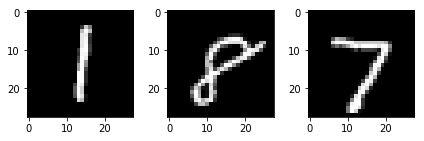

In [4]:
plt.subplot(131)
plt.imshow(np.reshape(X_train[500], (28, 28)), cmap=plt.get_cmap('gray')) #plot the 501st train set entry
print('corresponding label first image:' + str(Y_train[500]))

plt.subplot(132)
plt.imshow(np.reshape(X_train[-1], (28, 28)), cmap=plt.get_cmap('gray')) #plot the last train set entry
print('corresponding label middle image:' + str(Y_train[-1]))

plt.subplot(133)
plt.imshow(np.reshape(X_val[0], (28, 28)), cmap=plt.get_cmap('gray')) #plot the first validation set entry
print('corresponding label last image:' + str(Y_val[0]))

plt.tight_layout()

plt.show()

We need this encoding because of the way the network makes decisions on multi-class problems (more than two separate classes). The last layer in the network will have a number of neurons equal to the number of classes (and the size of the one-hot vector!). You can visualise it in the MNIST case as such:

![logistic regression](http://www.paulvangent.com/files/DL_Course/day1_images/outputlayer.jpg)

In the case of an input image with a '1' on it, we want all the neurons to output an activation value close to zero, *except the second one, which represents the digit '1'*. **Can you explain how the one-hot vector relates to the output?** 

When classes are mutually exclusive (there is only one correct answer), the output layer often uses a 'softmax' function. The softmax function scales the output vector so that its total sum equals one. Now each neuron in the output layer can be seen as representing the probability of being the correct output. See the image below for a visualisation:

![softmax](http://www.paulvangent.com/files/DL_Course/day1_images/softmax_one-hot.png)


***

## 3 - Building Blocks of Neural Nets

As discussed in the lectuers this morning, the basis of the neural net is a single neuron. You can think of a single neuron as a being a special flavor of logistic regression. It takes the available inputs and weighs them, sums them together, adds a bias 'b' term, and computes an activation function (here we used the sigmoid function) to determine the output value.

![logistic regression](http://www.paulvangent.com/files/DL_Course/day1_images/logreg1.jpg)

Usually a bias term 'b' is added, which quite literally 'biases' the neuron towards or away from activation. When updating the weights during training, the bias term is individually updated as well.

'Activation functions' compute the output value of the neuron. An important feature of them is that they add non-linearity to the linear weighting and summation steps. 
- **Can you explain why this is important?**
- **What are the effects of this non-linearity on the type of functions the neuron can fit to the data?**

We have provided plots of several popular activation functions here:

![Activation Fucntions](http://www.paulvangent.com/files/DL_Course/day1_images/activationfunctions.jpg)

***

## 4 - Defining a Feed Forward Net in Keras

In this function we define a simple two-layer neural net, consisting only of an input layer and an output layer. It will look a little like this:

![Simple neural net](http://www.paulvangent.com/files/DL_Course/day1_images/NN1.jpg)

Some things to note:
- The input layer is the same size as the number of pixels in the MNIST images (28x28 = 784) 
- The output layer is of size equal to the number of classes in our dataset. 
    * *The numbers range from 0-9, so the number of classes is 10. This means we have 10 output neurons.*
    
In the output layer, each of the 10 neurons represents one class. When classifying, the neuron with the highest activation represents the network's decision. For example if in the output layer the first neuron shows the highest activation, the predicted digit is 0.

Your task is to add an **input** and an **output** layer to the model below. 

The **input** layer expects three arguments:
- number of input values (in this function, that is **input_dim[0]**)
- shape of input (input_dim)
- activation function (use 'relu')

The **output** layer expects two arguments:
- the size of the output (the number of classes)
- the activation function (use a softmax function)

[Hint](https://keras.io/layers/core/#dense)

In [5]:
def baseline_model(input_dim=(784,), num_classes=10):
    '''Function to generate a baseline neural net
    
    Keyword arguments:
    - input_shape: expected dimensions of input data (default = (784,))
    - num_classes: total number of categories in dataset (default = 10)
    '''
    
    model = Sequential()
    ##Add your code here (Approx. 2 lines)
    model.add(Dense(input_dim[0], input_shape=input_dim, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    ##End of your code
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [6]:
#call the function to build the model
model = baseline_model(input_dim=(784,), num_classes=10)

# 5 - Training Your Baseline Model

So far we:
- Loaded a dataset consisting of 65,000 digits into memory, split into 55k training examples and 10k validation examples;
    * There's also a test set of 5K examples which we will not use now;
    * **Can you explain the importance of a test set?**
- Normalised the image data, and converted the label data to one-hot encoding;
- Built a baseline neural net consisting of an input layer and an output layer.

Now it's time to put our creation to work! To do so, Keras model instances have the 'fit()' function. The fit() function trains the model for a given number of epochs (=full passes through entire training set). You can specify a validation set to evaluate performance after each epoch.

**Exercise:** Your task is to fit the model to the data by calling **model.fit()** with the appropriate arguments. Complete the function call below. It will expect:
- training samples and training labels
- validation samples and labels
- number of epochs (use 10 epochs for now)
- batch size (use 256 for now)
***
Hint: [look at the Keras "model" API entry](https://keras.io/models/sequential/)  
Hint2: [look a little closer](https://keras.io/models/sequential/#fit)

In [7]:
##Your code here (approx. 1 line)
model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=10,
          batch_size=256)
##End of your code

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 86us/step - loss: 1.7193 - acc: 0.6095 - val_loss: 1.0087 - val_acc: 0.7890
Epoch 2/10
55000/55000 [==============================] - 1s 16us/step - loss: 0.7474 - acc: 0.8309 - val_loss: 0.5599 - val_acc: 0.8672
Epoch 3/10
55000/55000 [==============================] - 1s 16us/step - loss: 0.4988 - acc: 0.8737 - val_loss: 0.4265 - val_acc: 0.8909
Epoch 4/10
55000/55000 [==============================] - 1s 17us/step - loss: 0.4096 - acc: 0.8906 - val_loss: 0.3702 - val_acc: 0.9002
Epoch 5/10
55000/55000 [==============================] - 1s 17us/step - loss: 0.3657 - acc: 0.8988 - val_loss: 0.3374 - val_acc: 0.9059
Epoch 6/10
55000/55000 [==============================] - 1s 17us/step - loss: 0.3387 - acc: 0.9048 - val_loss: 0.3158 - val_acc: 0.9111
Epoch 7/10
55000/55000 [==============================] - 1s 16us/step - loss: 0.3204 - acc: 0.9091 - val_loss: 0.3002 - val_acc

**Expected Output:**

Train on 55000 samples, validate on 10000 samples  
Epoch 1/10  
55000/55000 [==============================] - 8s 144us/step - loss: 1.7160 - acc: 0.5975 - val_loss: 1.0110 - val_acc: 0.8023  
Epoch 2/10  
55000/55000 [==============================] - 7s 128us/step - loss: 0.7537 - acc: 0.8295 - val_loss: 0.5631 - val_acc: 0.8673  
Epoch 3/10  
55000/55000 [==============================] - 7s 130us/step - loss: 0.5015 - acc: 0.8735 - val_loss: 0.4301 - val_acc: 0.8901  
.....   
Epoch 10/10  
55000/55000 [==============================] - 7s 136us/step - loss: 0.2851 - acc: 0.9179 - val_loss: 0.2727 - val_acc: 0.9202 

***

**Note** that the actual numbers will vary for your training case, depending on cpu speed, how the network initialises, and the random shuffle of the training data.  

***

You've now trained a simple network! How well did it perform?

In the next section we'll expand the architecture and introduce a hidden layer into the network.

# 6 - Adding a Hidden Layer

It's time to add a hidden layer to the network. 

**Exercise:** Below is the model definition function you wrote earlier. Your task is to add a hidden layer with 1024 units to the function defined below. Use a relu activation function. Put a dropout regularisation layer between the hidden layers and the output layer. Use a dropout rate of 20%.

***
Hint: [Normal layer](https://keras.io/layers/core/#dense)  
Hint2: [Dropout layer](https://keras.io/layers/core/#dropout)

In [15]:
def hiddenlayer_model(input_dim=(784,), num_classes=10):
    '''Function to generate a baseline neural net
    
    Keyword arguments:
    - input_shape: expected dimensions of input data (default = (784,))
    - num_classes: total number of categories in dataset (default = 10)
    '''
    
    model = Sequential()
    model.add(Dense(input_dim[0], input_shape=input_dim, activation='relu'))
    ##Add your code here (Approx 2 lines)
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    ##End of your code
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [16]:
model = hiddenlayer_model()

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                10250     
Total params: 1,429,530
Trainable params: 1,429,530
Non-trainable params: 0
_________________________________________________________________
None


In the output you should see four layers. Two dense, a Dropout, and a Dense at the end.

Shapes should be, respectively:  
(None, 784)  
(None, 1024)  
(None, 1024)  
(None, 10)  

**Can you explain why adding a hidden layer improves our model's capabilities? What is it's effect?**

***

The next step is to fit the model again. The process is the same as you did with the neural net before. 

**Exercise:** Your task is to complete the fit function again. Remember to pass the **model.fit()** function:
- training samples and labels
- validation samples and labels
- number of epochs (use 10)
- batch size (use 256)

In [13]:
##Your code here (approx. 1 line)
model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=10,
          batch_size=256)
##End of your code

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 30us/step - loss: 0.9469 - acc: 0.7289 - val_loss: 0.4078 - val_acc: 0.8842
Epoch 2/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.3690 - acc: 0.8920 - val_loss: 0.3289 - val_acc: 0.9043
Epoch 3/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.3062 - acc: 0.9104 - val_loss: 0.2664 - val_acc: 0.9204
Epoch 4/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.2615 - acc: 0.9227 - val_loss: 0.2313 - val_acc: 0.9315
Epoch 5/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.2266 - acc: 0.9330 - val_loss: 0.2154 - val_acc: 0.9358
Epoch 6/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.1968 - acc: 0.9412 - val_loss: 0.1766 - val_acc: 0.9467
Epoch 7/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.1747 - acc: 0.9485 - val_loss: 0.1711 - val_acc

***
Since you added the hidden layer, did performance increase? **Why do you think this is (not) the case?**

**Can you explain the effects of the dropout layer?**

**Exercise:** Try removing the dropout layer from the model function. You can either put a '#' in front of the line or delete it. Don't forget to run the cell afterwards (shift enter). After you've done this, complete and the cell below and compare to the training run above.

In [17]:
model = hiddenlayer_model()
##Your code here (approx. 1 line)
model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=10,
          batch_size=256)
##End of your code

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 31us/step - loss: 0.9154 - acc: 0.7310 - val_loss: 0.3992 - val_acc: 0.8801
Epoch 2/10
55000/55000 [==============================] - 1s 22us/step - loss: 0.3615 - acc: 0.8942 - val_loss: 0.3083 - val_acc: 0.9101
Epoch 3/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.2985 - acc: 0.9138 - val_loss: 0.2705 - val_acc: 0.9200
Epoch 4/10
55000/55000 [==============================] - 1s 22us/step - loss: 0.2594 - acc: 0.9251 - val_loss: 0.2394 - val_acc: 0.9283
Epoch 5/10
55000/55000 [==============================] - 1s 22us/step - loss: 0.2226 - acc: 0.9345 - val_loss: 0.2088 - val_acc: 0.9393
Epoch 6/10
55000/55000 [==============================] - 1s 22us/step - loss: 0.1930 - acc: 0.9435 - val_loss: 0.1789 - val_acc: 0.9465
Epoch 7/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.1672 - acc: 0.9509 - val_loss: 0.1647 - val_acc

Feel free to play with adding more layers to the model, or with training it for more epochs at this point. When you're finished it's time to look at how the model performs on a different dataset.

## 7 - Moving On To Object Recognition

We will now apply this model to the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

This dataset contains 60,000 images divided into 10 different classes (hence CIFAR**10**), from inanimate objects (cars, airplanes) to animals.

![cifar10](http://www.paulvangent.com/files/DL_Course/day1_images/cifar_10.png)

In this exercise we will show you how to load the data and flatten each image into a vector, but you have to do the normalisation and one-hot encoding yourself.

In [18]:
from keras.datasets import cifar10

(X_train, Y_train), (X_val, Y_val) = cifar10.load_data()

Now we flatten each image so that the resulting array has shape (number_of_images, pixels_per_image). We have colour images of 32x32 pixels, so the shape of each image array is 32x32x3 (3 colour channels for **R**ed **G**reen & **B**lue). To get the size of the flattened image, we thus use 32x32x3 (=3,072).

To flatten the image, we use [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). Note we can get the shape from the image array with **.shape**. This returns an array with an entry for each dimension on the image. It's in the format *[Number-of-samples, X-pixels, Y-pixels, number-of-colour-channels]*.

In [19]:
#We flatten each image in validation and train sets
X_train_flat = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3]))
X_val_flat = np.reshape(X_val, (X_val.shape[0], X_val.shape[1] * X_val.shape[2] * X_val.shape[3]))

**Exercise:** Your next exercise is to complete the code below. You need to take two steps:
- normalise the images between 0 and 1. Note that the images consist of 8-bit integers, meaning their range is between 0-255.
- apply one-hot encoding to the labels. How many classes do we have?

[One-hot encoding hint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html). 
You can also look at how we did it earlier in this notebook.

In [20]:
#Normalise each image
##Add your code here (approx. 2 lines)
X_train_flat = X_train_flat / 255.
X_val_flat = X_val_flat / 255.
##End of your code


#Convert labels to one-hot
##Add your code here (approx. 2 lines)
Y_train_hot = np.eye(10)[Y_train.reshape(-1)]
Y_val_hot = np.eye(10)[Y_val.reshape(-1)]
##End of your code

print('shape of first training example is: ' + str(X_train_flat[0].shape))
print('shape of last validation example is: ' + str(X_val_flat[-1].shape))
print('shape of first one-hot vector in training is: ' + str(Y_train_hot[0].shape))
print('shape of last one-hot vector in validation is: ' + str(Y_val_hot[-1].shape))

shape of first training example is: (3072,)
shape of last validation example is: (3072,)
shape of first one-hot vector in training is: (10,)
shape of last one-hot vector in validation is: (10,)


**Expected output:**

shape of first training example is: (3072,)  
shape of last validation example is: (3072,)  
shape of first one-hot vector in training is: (10,)  
shape of last one-hot vector in validation is: (10,)  

***

Now we call the hiddenlayer_model you wrote earlier to initialise a fresh model. We use input_size of 3072 (32x32x3), and 10 classes.

**Exercise:** Initialise the model by completing and running the code below.

In [21]:
##Add your code here (approx. 1 line)
model = hiddenlayer_model(input_dim=(3072,), num_classes=10)
##End of your code

***

Now fit the model. Fill in the blanks below, remember to feed the model.fit() function:
- X and Y from the training data
- X and Y for the validation data
- set the number of epochs to 10
- Batch size of 256 is advised.
- In stead of just calling model.fit, we will add "history = " before the fit function. You will see why afterwards.

**hint:** If you're stuck, you can refer up to the earlier time we called model.fit()

Once fitting starts, go get a cup of coffee! This will take ~10-30 minutes depending on your hardware.

In [22]:
##Add your code here (approx. 1 line)
history = model.fit(X_train_flat, Y_train_hot,
                      validation_data=(X_val_flat, Y_val_hot),
                      epochs=10,
                      batch_size=256)
##End of your code

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 110us/step - loss: 2.2921 - acc: 0.2839 - val_loss: 1.7581 - val_acc: 0.3692
Epoch 2/10
50000/50000 [==============================] - 5s 94us/step - loss: 1.7011 - acc: 0.3915 - val_loss: 1.6596 - val_acc: 0.4005
Epoch 3/10
50000/50000 [==============================] - 5s 93us/step - loss: 1.6052 - acc: 0.4279 - val_loss: 1.6043 - val_acc: 0.4299
Epoch 4/10
50000/50000 [==============================] - 5s 92us/step - loss: 1.5405 - acc: 0.4532 - val_loss: 1.5510 - val_acc: 0.4476
Epoch 5/10
50000/50000 [==============================] - 5s 92us/step - loss: 1.4935 - acc: 0.4691 - val_loss: 1.4837 - val_acc: 0.4736
Epoch 6/10
50000/50000 [==============================] - 5s 92us/step - loss: 1.4500 - acc: 0.4855 - val_loss: 1.4959 - val_acc: 0.4655
Epoch 7/10
50000/50000 [==============================] - 5s 96us/step - loss: 1.4075 - acc: 0.5003 - val_loss: 1.4291 - val_ac

****
**Expected Output:**

Train on 50000 samples, validate on 10000 samples  
Epoch 1/10  
50000/50000 [==============================] - 5s 109us/step - loss: 2.4346 - acc: 0.2858 - val_loss: 1.7262 - val_acc: 0.3769  
Epoch 2/10  
50000/50000 [==============================] - 5s 95us/step - loss: 1.7014 - acc: 0.3898 - val_loss: 1.6754 - val_acc: 0.4025  
[...]    
Epoch 10/10  
50000/50000 [==============================] - 5s 93us/step - loss: 1.3486 - acc: 0.5186 - val_loss: 1.4063 - val_acc: 0.5060  
***

Remember how we added "history =" before model.fit? We did this because, by default, the Keras fit function returns a history object containing information about the training phase of the model. This will help us gauge performance, spot possible overfitting, as well as help with model selection.

To visualise, run the cell below

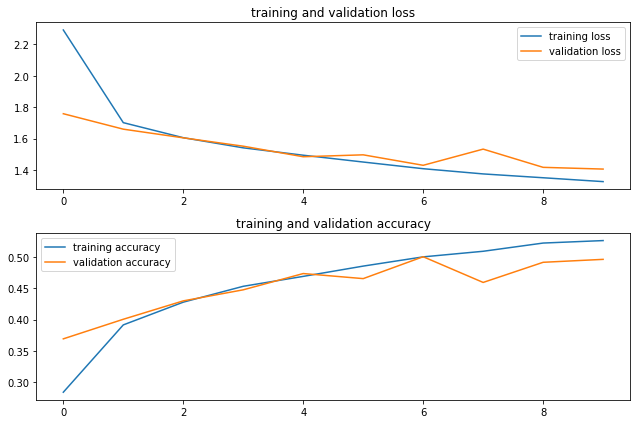

In [23]:
plt.figure(figsize=(9,6))

plt.subplot(211)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('training and validation loss')

plt.subplot(212)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.legend()
plt.title('training and validation accuracy')

plt.tight_layout()

plt.show()

***

Another great way of visualising model performance is a so-called **confusion plot**. It plots predicted labels against actual labels. 

We've provided you with the confusion matrix for our version of the feed forward network trained on CIFAR-10. It displays the prediction performance on the training set.

Take a look at the plot:

![confusion plot](http://www.paulvangent.com/files/DL_Course/day1_images/confusionmatrix_cifar10.png)

Already some pretty interesting patterns are visible! Cars and trucks are confused, which makes sense. In general, the inanimate objects (airplane, automobile, ship, truck) are confused with each other more often than the animals in the set. 

**What do you think, is this indicative of the model learning rules that would help it to generalise?** Incorrect results can often give a lot more information than correct ones.

For more information on how to make your own confusion plot, [take a look here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

***
## 8 - Wrapping up
Our simple neural network with two hidden layers doesn't work very well for the CIFAR data. After 10 epochs our version of the model reaches ~50% accuracy. While a lot higher than the ~10% chance level we would expect if the network learned absolutely nothing from the data, it still means that **half the time** our prediction is **dead wrong**.

Could training longer be an option? To illustrate, we let the model run a little longer (50 epochs) on a powerful GPU, but the model only ended up overfitting. As displayed on the plot below, the signs of overfitting are there. You can spot overfitting:
- The training accuracy keeps increasing but the validation accuracy flattens off: the model isn't learning anything new that helps it generalise, it only learns to fit the training set better. **Can you explain why that is bad? Is it always bad?**
- Similarly, the training loss keeps decreasing but the validation loss flattens off, and even starts increasing again later on. **Can you explain how this relates to overfitting?**

![50 epochs](http://www.paulvangent.com/files/DL_Course/day1_images/NN_plot1.jpg)

***
**Maybe adding more layers might work?** As an example, we added 5 more hidden layers of a larger size (2048 neurons each) with regularisation layers in between, and let the model run for 50 epochs. The behaviour is very similar to what is displayed above, indicating this is not a sound strategy:

![50 epochs with bigger network](http://www.paulvangent.com/files/DL_Course/day1_images/NN_plots_biggernet2.png)
***
We might even try... 
![really?](http://www.paulvangent.com/files/DL_Course/day1_images/layers.jpg)

But then we run into serious issues with available computation power and memory, and it likely will not improve performance. Clearly slapping more layers onto the model is not the correct approach.

It's time to dig a little deeper.

![deeeeeeeeeeeeeeper](http://www.paulvangent.com/files/DL_Course/day1_images/deeper.jpg)

Much deeper.


- **When adding more layers the network becomes more complex, what is the effect on overfitting? Can you explain?**
- **How can we counteract the tendency to overfit?**
- **What will the effect of regularisation be?**

***
For more information on how the learning rate affects the network fitting behaviour, take a look [at this link](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)
***

## Next steps

Congratulations on making it this far! In the next exercise notebook we will be looking at implementing a **convolutional neural network**, and applying it to CIFAR-100 to see if it works any better than a standard feedforward network.

In stead of adding more layers, we will be adding smarter layers.

[Click here to go to it](Exercise 2 - Convolutional Neural Nets.ipynb)